<a href="https://colab.research.google.com/github/violaamelia24/Projek-Analisis-Data-Dicoding/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Viola Amelia
- **Email:** v.amelia2407@gmail.com
- **ID Dicoding:** viola_amelia_PkHd

## Menentukan Pertanyaan Bisnis

- Bagaimana penjualan per hari dari e-commerce?
- Apa sistem pembayaran yang banyak digunakan oleh pembeli?

## Import Semua Packages/Library yang Digunakan

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py

## Data Wrangling

### Gathering Data

Membaca data payment

In [109]:
order_payment= pd.read_csv("order_payments_dataset.csv")
order_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Membaca data item

In [110]:
items= pd.read_csv("order_items_dataset.csv")
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Membaca data produk

In [5]:
product=pd.read_csv("products_dataset.csv")
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Membaca data order

In [6]:
order=pd.read_csv("orders_dataset.csv")
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Menggabungkan data sales

In [111]:
df_one=pd.merge(order_payment,items,on='order_id',how='inner')
df_ones=pd.merge(df_one,order,on='order_id',how='inner')
df_two=pd.merge(df_ones,product,on='product_id',how='inner')
df=df_two.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])
df['order_date'] = df['order_purchase_timestamp'].str[:10]
df

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,order_date
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,casa_construcao,2018-04-25
1,d86305c284cecff56c7ee9d3fbd4f8d6,1,credit_card,4,93.72,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-04-19 23:10:02,79.80,13.92,0e37385834260d6111727103a93e790a,delivered,2018-04-15 22:53:59,2018-04-15 23:10:32,2018-04-16 23:54:55,2018-04-20 00:07:39,2018-05-09 00:00:00,casa_construcao,2018-04-15
2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,automotivo,2018-06-26
3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,perfumaria,2017-12-12
4,1966886b80f14d0588adf6406afb0026,1,debit_card,1,68.89,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-09-01 16:06:59,56.99,11.90,7238ed1e0d25683b9b65e1039e9d942b,invoiced,2017-08-22 16:01:44,2017-08-23 16:06:59,NaN,NaN,2017-09-19 00:00:00,perfumaria,2017-08-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,6a87a0371f263aa8c1779c2c115c1427,1,credit_card,2,83.09,1,1f58e3c365e615b33b2b30b068d7578a,2a5b78b41cd05baeac8df54c6606b92c,2017-11-30 16:13:44,74.82,8.27,4dbe5e9eb8cc354eb79fa6e9971d0a3d,delivered,2017-11-25 15:51:01,2017-11-25 16:13:44,2017-11-27 23:38:43,2017-11-28 12:49:43,2017-12-11 00:00:00,beleza_saude,2017-11-25
117597,e0657085c2b6297a32f39efa200cdf72,1,credit_card,1,26.37,1,e2336d327209ca849dca5afda036f842,a8739afb32aaa45e01815ca76f76f54b,2018-08-07 21:24:28,18.98,7.39,a109663eb89cc2658b051385cac35f02,delivered,2018-08-04 21:12:12,2018-08-04 21:24:28,2018-08-07 09:00:00,2018-08-08 17:49:25,2018-08-10 00:00:00,eletronicos,2018-08-04
117598,9ac048d7ffebba67d54456aa9ec07d7e,1,credit_card,1,60.69,1,0dcb1adbafdcc389972874b01fa249b8,2f74af7a0ee5636f12c2336f9fffed47,2017-11-24 19:09:29,44.90,15.79,43b2b1e92aa657113661dae48ca9e17c,delivered,2017-11-20 18:50:52,2017-11-20 19:09:29,2017-11-24 18:24:57,2017-12-05 22:56:43,2017-12-12 00:00:00,esporte_lazer,2017-11-20
117599,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,1,fea2f92877b647dc07ea8e3f4aa2cf3f,406822777a0b9eb5c50e442dd4cd3ec5,2018-05-22 12:30:57,179.80,19.14,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12 00:00:00,brinquedos,2018-05-16


### Assessing Data

Mengecek tipe data

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117601 non-null  object 
 1   payment_sequential             117601 non-null  int64  
 2   payment_type                   117601 non-null  object 
 3   payment_installments           117601 non-null  int64  
 4   payment_value                  117601 non-null  float64
 5   order_item_id                  117601 non-null  int64  
 6   product_id                     117601 non-null  object 
 7   seller_id                      117601 non-null  object 
 8   shipping_limit_date            117601 non-null  object 
 9   price                          117601 non-null  float64
 10  freight_value                  117601 non-null  float64
 11  customer_id                    117601 non-null  object 
 12  order_status                  

Mengecek missing value

In [113]:
df.isna().sum()

order_id                            0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
product_category_name            1698
order_date                          0
dtype: int64

In [114]:
print("Duplicates : ", df.duplicated().sum())

Duplicates :  0


Mengecek Parameter Statistik

In [115]:
df.describe()

,payment_sequential,payment_installments,payment_value,order_item_id,price,freight_value
count,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000,117601.000000
mean,1.093528,2.939482,172.686752,1.195900,120.824783,20.045990
std,0.726692,2.774223,267.592290,0.697706,184.479323,15.861315
min,1.000000,0.000000,0.000000,1.000000,0.850000,0.000000
25%,1.000000,1.000000,60.870000,1.000000,39.900000,13.080000
50%,1.000000,2.000000,108.210000,1.000000,74.900000,16.290000
75%,1.000000,4.000000,189.260000,1.000000,134.900000,21.190000
max,29.000000,24.000000,13664.080000,21.000000,6735.000000,409.680000


### Cleaning Data

Memperbaiki tipe data pada tanggal order

In [116]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   payment_sequential             117601 non-null  int64         
 2   payment_type                   117601 non-null  object        
 3   payment_installments           117601 non-null  int64         
 4   payment_value                  117601 non-null  float64       
 5   order_item_id                  117601 non-null  int64         
 6   product_id                     117601 non-null  object        
 7   seller_id                      117601 non-null  object        
 8   shipping_limit_date            117601 non-null  object        
 9   price                          117601 non-null  float64       
 10  freight_value                  117601 non-null  float64       
 11  

Menghapus missing data

In [118]:
df=df.dropna()
df.isna().sum()

order_id                         0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_category_name            0
order_date                       0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [119]:
df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,order_date
6736,0cacc6e732b7bc8f08cca2ba2604fb1e,1,credit_card,2,65.09,1,fb7a100ec8c7b34f60cec22b1a9a10e0,d98eec89afa3380e14463da2aabaea72,2017-10-10 21:35:23,49.99,15.10,89c8c50250e077c8977215502000c179,delivered,2017-10-04 21:26:58,2017-10-04 21:35:23,2017-10-10 20:49:09,2017-10-13 17:45:05,2017-11-09 00:00:00,brinquedos,2017-10-04
49186,f2bba1addbdc9530839fcde7c33c596e,1,credit_card,10,788.12,1,df25e7b5824286070a418f1fc2f78629,7e93a43ef30c4f03f38b393420bc753a,2017-11-20 20:50:34,719.99,68.13,2715d7fd8d3dcf331ee4814a00a51a54,delivered,2017-11-13 20:44:33,2017-11-13 20:50:34,2017-11-14 23:17:04,2017-11-22 19:37:42,2017-12-01 00:00:00,relogios_presentes,2017-11-13
97543,bd3e89bd89fac4760b244047d795e2fe,1,credit_card,5,61.75,1,78514b0a0cec96621010b7b6a2bfd6c6,30a2f535bb48308f991d0b9ad4a8c4bb,2017-12-13 10:31:35,49.90,11.85,046911a55a7bc12ca917758e9c4cb5ee,delivered,2017-12-07 09:40:04,2017-12-07 10:31:35,2017-12-07 20:21:06,2017-12-11 18:52:39,2018-01-02 00:00:00,moveis_decoracao,2017-12-07
44228,dc20ddee58064808944cd819f518dcc1,1,credit_card,7,75.38,2,6abd84909e8ed79ef808c16f90b91093,da8622b14eb17ae2831f4ac5b9dab84a,2018-07-10 11:45:39,29.90,7.79,2b3ffb4e78551e897b22e02455f34d8c,delivered,2018-07-08 11:32:31,2018-07-08 11:45:39,2018-07-10 15:43:00,2018-07-13 14:24:42,2018-07-19 00:00:00,beleza_saude,2018-07-08
66737,1ec5c99642df4c4c2469179b48e0343b,1,credit_card,4,53.96,1,439d0c278b77ddc4b1488de210c8df35,259f7b5e6e482c230e5bfaa670b6bb8f,2018-03-14 14:29:00,58.90,26.49,1f052326d77ddba70bf6747a402e683a,delivered,2018-03-07 20:42:01,2018-03-08 14:29:00,2018-03-09 21:04:15,2018-03-20 20:48:33,2018-04-03 00:00:00,cama_mesa_banho,2018-03-07


In [120]:
df.describe(include="all")

<ipython-input-120-7150bae0ffd8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all")


,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,order_date
count,113391,113391.000000,113391,113391.000000,113391.000000,113391.000000,113391,113391,113391,113391.000000,113391.000000,113391,113391,113391,113391,113391,113391,113391,113391,113391
unique,95129,NaN,4,NaN,NaN,NaN,31626,2914,90128,NaN,NaN,95129,2,94625,87125,78921,94341,444,73,611
top,895ab968e7bb0d5659d16cd74cd1650c,NaN,credit_card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,cama_mesa_banho,2017-11-24 00:00:00
freq,63,NaN,83707,NaN,NaN,NaN,529,2094,63,NaN,NaN,63,113384,63,63,63,63,637,11649,1374
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-03 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-08-29 00:00:00
mean,NaN,1.089937,NaN,2.942429,172.257625,1.196841,NaN,NaN,NaN,120.200053,20.024046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.682054,NaN,2.777869,266.648089,0.701268,NaN,NaN,NaN,182.840102,15.752444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.000000,NaN,1.000000,61.000000,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


mengelompokkan jumlah pendapatan berdasarkan date

In [121]:
average_sales = df.groupby('order_date')['payment_value'].mean().reset_index()
average_sales.head()

,order_date,payment_value
0,2016-10-03,74.392500
1,2016-10-04,172.704058
2,2016-10-05,257.346275
3,2016-10-06,177.097234
4,2016-10-07,194.183261


eskplor data order per hari

In [122]:
df.groupby(by="order_date").agg({"order_id": "nunique",
    "payment_value": ["max", "min", "mean", "std", ]})

order_id payment_value                               
            nunique           max    min        mean         std
order_date                                                      
2016-10-03        8        154.57  35.61   74.392500   46.858120
2016-10-04       53        982.41   0.74  172.704058  179.091938
2016-10-05       35        818.12  10.50  257.346275  251.713140
2016-10-06       41        671.31  33.42  177.097234  175.134812
2016-10-07       39        611.56  29.86  194.183261  143.946733
...             ...           ...    ...         ...         ...
2018-08-25       69       2328.40   0.31  165.829740  297.664986
2018-08-26       72       1312.67   2.28  124.152024  154.315104
2018-08-27       65        545.51  11.18   92.823889   91.206924
2018-08-28       39        712.90  14.89  106.653191  113.849605
2018-08-29       11        510.96  14.29  266.416250  216.792276

[611 rows x 5 columns]

eksplor data jumlah pengguna tiap sistem pembayaran

In [123]:
df["payment_type"].value_counts()

credit_card    83707
boleto         22047
voucher         6012
debit_card      1625
Name: payment_type, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Bagaimana penjualan per hari dari e-commerce?**

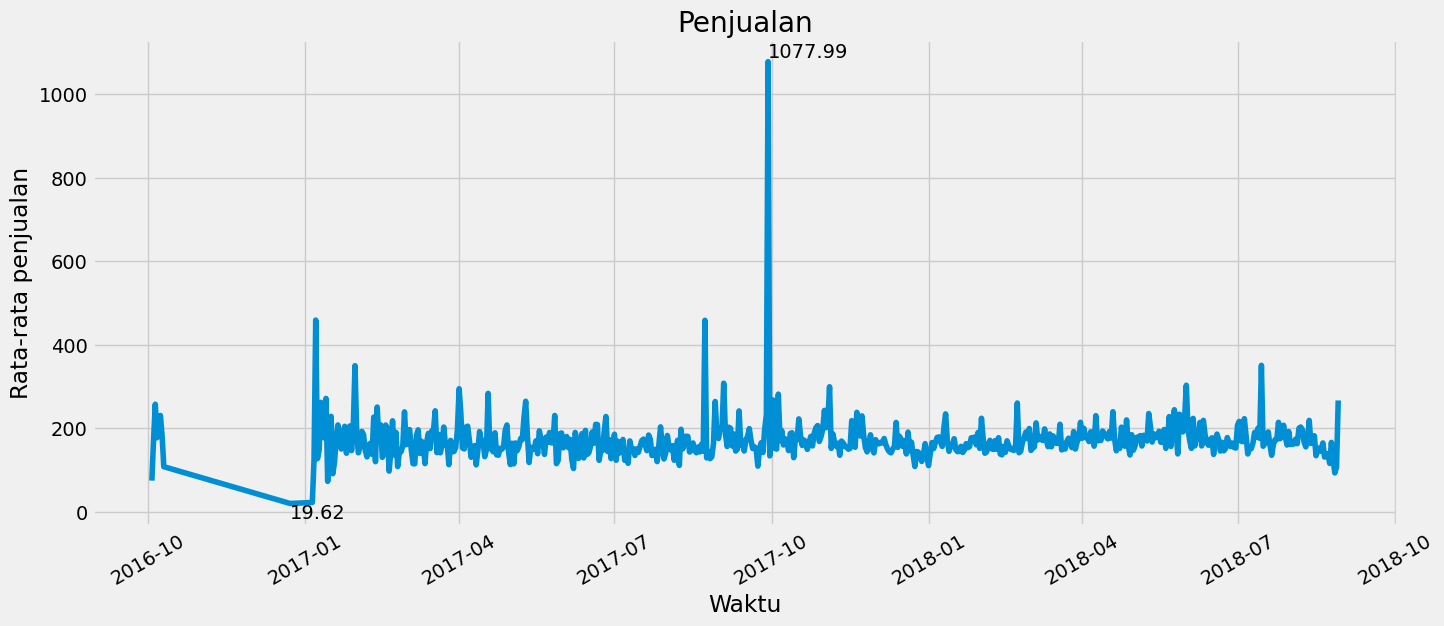

In [124]:
fig2 = plt.figure(figsize=(15,6))
plt.plot(average_sales['order_date'], average_sales['payment_value'])

max_value = average_sales['payment_value'].max()
min_value = average_sales['payment_value'].min()

max_index = average_sales.loc[average_sales['payment_value'] == max_value, 'order_date'].iloc[0]
min_index = average_sales.loc[average_sales['payment_value'] == min_value, 'order_date'].iloc[0]

plt.text(max_index, max_value, f'{max_value:.2f}', ha='left', va='bottom')
plt.text(min_index, min_value, f'{min_value:.2f}', ha='left', va='top')

plt.title("Penjualan")
plt.xlabel("Waktu")
plt.ylabel("Rata-rata penjualan")
plt.xticks(rotation=30)
plt.grid(True)
plt.show()

### Pertanyaan 2:

**Apa sistem pembayaran yang banyak digunakan oleh pembeli?**

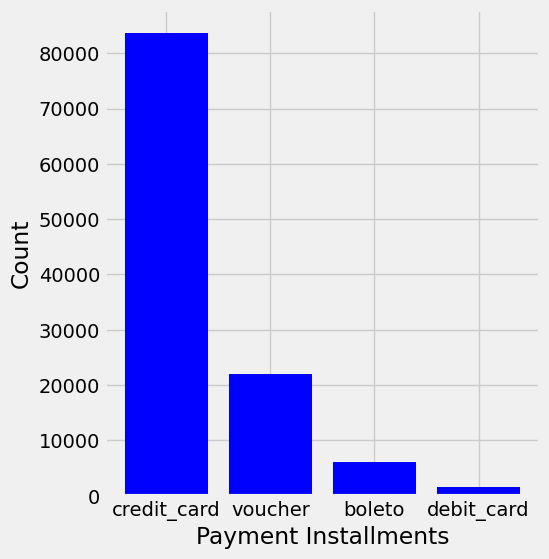

In [125]:
fig= plt.figure(figsize=(5,6))
plt.style.use('fivethirtyeight')
plt.bar(
    x=df["payment_type"].unique(),
    height=df["payment_type"].value_counts().to_list(),
    color='blue'
    )
plt.xlabel('Payment Installments')
plt.ylabel('Count')
plt.show()

## Conclusion

- Dari Sales Line Chart terlihat bahwa penjualan setiap harinya stabil, dan ada hari dengan kenaikan sales tinggi pada tahun 2017, dari data tersebut kita dapat mengevaluasi lebih lanjut mengenai penjualan tersebut dan event apakah yang menaikkan penjualan tersebut, sehingga kita bisa mendapatkan lebih banyak promosi, seperti misalnya di tanggal kembar seperti promosi 2.2 atau, dll. dan bagaimana mengatasi hari yang penjualannya lebih rendah. Jadi kita dapat terus memperbaiki dan menyediakan apa yang dibutuhkan oleh sekitar saat ini.

- Dari diagram batang Jenis Pembayaran kita mengetahui bahwa Kartu Kredit adalah jenis pembayaran yang paling banyak digunakan pembeli. Ini dapat menjadi perhatian bagi seorang penjual jika ingin meningkatkan penjualannya, mereka dapat melakukan promosi dengan syarat dan ketentuan jenis pembayaran tertentu. Dan kita bisa melihat layanan apa saja yang perlu kita upgrade lebih lanjut.